In [16]:
import xarray as xr
import numpy as np


In [81]:
import cartopy.feature as cfeat
import matplotlib.pyplot as plt

import iris
import iris.plot as iplt
import iris.quickplot as qplt


In [17]:
odir = "/work/mh0033/m300883/3rdPanel/data/influence/"

In [73]:
uFirst = xr.open_dataset(odir+"u10/uFirst.nc")
vFirst = xr.open_dataset(odir+"v10/vFirst.nc")


# to_iris

In [74]:
def xr2iris(data,mode,extr_type,var = 'u10',long_name = '10m u-velocity'):

    # select one map
    data = data.sel(mode = mode,extr_type = extr_type)
    data = data.drop_vars(["hlayers","mode","extr_type"])
    
    # standard
    glo_Con = "CF-1.8"     
    data.attrs['Conventions'] = glo_Con
    data[var].attrs = {"long_name":long_name, "units": "m/s"}
    data = data[var].to_iris()

    return data

In [77]:
uwind = xr2iris(uFirst,mode = 'NAO',extr_type = 'pos')

In [78]:
vwind = xr2iris(vFirst,mode = 'NAO',extr_type = 'pos')

In [79]:
# Create a cube containing the wind speed.
windspeed = (uwind**2 + vwind**2) ** 0.5
windspeed.rename("windspeed")


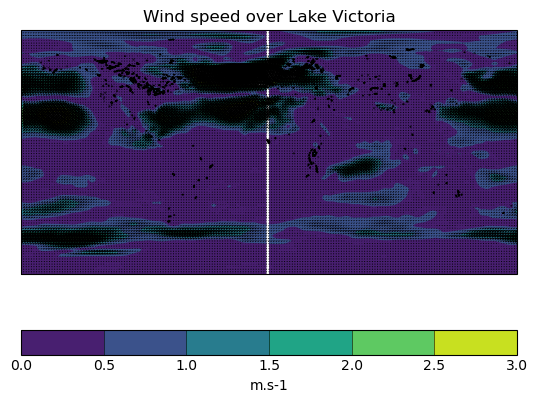

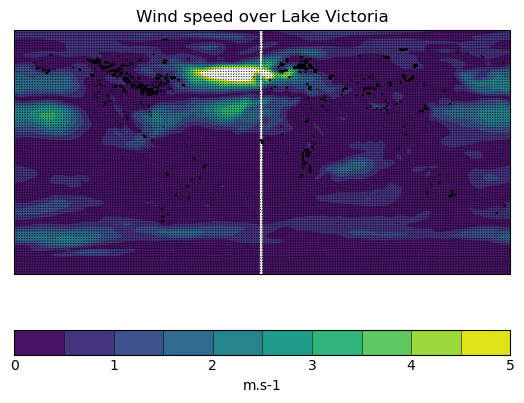

In [91]:
# Plot the wind speed as a contour plot.
qplt.contourf(windspeed, np.arange(0,3.1,0.5))

# Show the lake on the current axes.
lakes = cfeat.NaturalEarthFeature(
    "physical", "lakes", "50m", facecolor="none"
)
plt.gca().add_feature(lakes)

# Add arrows to show the wind vectors.
iplt.quiver(uwind, vwind, pivot="middle")

plt.title("Wind speed over Lake Victoria")
qplt.show()

# Normalise the data for uniform arrow size.
u_norm = uwind / windspeed
v_norm = vwind / windspeed

# Make a new figure for the normalised plot.
plt.figure()

qplt.contourf(windspeed, np.arange(0,5.1,0.5))
plt.gca().add_feature(lakes)
iplt.quiver(u_norm, v_norm, pivot="middle")

plt.title("Wind speed over Lake Victoria")
qplt.show()

